## Bachelor Thesis - Informatik

### Variante 1 :
### Klassisches Neuronales Netz mit Fully Connected (Dense) Layern
***

<div align="left">
<h2><img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExZ2hrOGtveWx0ZGxsaGFsYXNzbjVhOTNyaTg2cG44anZ5eWd5a3ZyMyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l3vRcrVqhBVSpJte0/giphy.gif" width="200" alt="Data"></h2>
</div>

Dieser Ansatz verwendet als Datengrundlage den folgenden Datensatz :

[https://github.com/michidk/myo-dataset]

###### ☑️ Der Datensatz wurde neu aufbereitet, siehe dazu --> [Link](Preprocessing.ipynb)

###### ☑️ 10 Testpersonen, nachfolgend Subjekte genannt, haben in 6 Sitzungen jeweils 10 Wiederholungen ausgeführt

###### ☑️ Alle Personen haben die folgenden drei Gesten in gleicher Position ausgeführt :

<img src="./Gestenbilder/paper.png" width="150">         <img src="./Gestenbilder/rock.png" width="150">        <img src="./Gestenbilder/scissors.png" width="150">      

#### ▶️ Installation notwendiger Python-Bibliotheken
***

In [1]:
##############################################################
#      Dieses Notebook wurde mit Python 3.9.13 getestet      #
#                                                            #
#           Andere Versionen haben teilweise                 #
#           Kompatbilitätsprobleme verursacht                #
#                                                            #
#      This Notebook was tested with Python 3.9.13           #
#                                                            #
#              Other Versions can cause                      #
#                Compatibilityproblems                       #
#                                                            #
##############################################################

In [2]:
##############################################################
# Achtung!! Die Konvertierung des Modells nach C++           #
#           funktioniert nur mit Tensorflow <=2.15.1         #
#           Keras 3 funktioniert nicht!                      #
#                                                            #
# Attention! Converting the model to C++ ist only working    #
#            with Tensorflow <=2.15.1                        #
#            Keras 3 will not work!                          #
##############################################################
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Gizmo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


#### ▶️ Importieren notwendiger Python-Bibliotheken
***

In [3]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import classification_report, confusion_matrix # type: ignore
from sklearn.preprocessing import MinMaxScaler, StandardScaler # type: ignore

import tensorflow as tf # type: ignore
from tensorflow import keras # type: ignore
from keras import layers # type: ignore

import logging
tf.get_logger().setLevel(logging.ERROR)

#### ▶️ Einlesen der aufgezeichneten Daten aus dem Quellordner
***

In [4]:
# Importiere die .csv-Dateien mit den EMG-Daten der einzelnen Subjekte und den einzelnen Labels (Gesten)
# Dabei gilt folgendes Schema, siehe auch Bilder im Ordner "Gestenbilder"
# Label 0 --> Papier
# Label 1 --> Stein
# Label 2 --> Schere


##############################################################
# Aufnahme der Einzelgesten                                  #
# Datentyp: Python List                                      #
##############################################################
subject1 = []
subject2 = []
subject3 = []
subject4 = []
subject5 = []
subject6 = []
subject7 = []
subject8 = []
subject9 = []
subject10 = []


##############################################################
# Baue daraus den Dateipfad und lese Datei ein               #
# Schreibe Nummer der Geste in entsprechende Spalte          #
##############################################################

for label in ['0', '1', '2']:
    subject1.append(pd.read_csv('./Datasets/Concatenated/S1L' + label + '.csv', sep=',', header=None))     
    subject1[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject2.append(pd.read_csv('./Datasets/Concatenated/S2L' + label + '.csv', sep=',', header=None))     
    subject2[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject3.append(pd.read_csv('./Datasets/Concatenated/S3L' + label + '.csv', sep=',', header=None))     
    subject3[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject4.append(pd.read_csv('./Datasets/Concatenated/S4L' + label + '.csv', sep=',', header=None))     
    subject4[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject5.append(pd.read_csv('./Datasets/Concatenated/S5L' + label + '.csv', sep=',', header=None))     
    subject5[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject6.append(pd.read_csv('./Datasets/Concatenated/S6L' + label + '.csv', sep=',', header=None))     
    subject6[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject7.append(pd.read_csv('./Datasets/Concatenated/S7L' + label + '.csv', sep=',', header=None))     
    subject7[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject8.append(pd.read_csv('./Datasets/Concatenated/S8L' + label + '.csv', sep=',', header=None))     
    subject8[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject9.append(pd.read_csv('./Datasets/Concatenated/S9L' + label + '.csv', sep=',', header=None))     
    subject9[int(label)][8] = int(label)

for label in ['0', '1', '2']:
    subject10.append(pd.read_csv('./Datasets/Concatenated/S10L' + label + '.csv', sep=',', header=None))     
    subject10[int(label)][8] = int(label)


##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
subject1 = pd.concat([df for df in subject1], axis=0).reset_index(drop=True)
subject2 = pd.concat([df for df in subject2], axis=0).reset_index(drop=True)
subject3 = pd.concat([df for df in subject3], axis=0).reset_index(drop=True)
subject4 = pd.concat([df for df in subject4], axis=0).reset_index(drop=True)
subject5 = pd.concat([df for df in subject5], axis=0).reset_index(drop=True)
subject6 = pd.concat([df for df in subject6], axis=0).reset_index(drop=True)
subject7 = pd.concat([df for df in subject7], axis=0).reset_index(drop=True)
subject8 = pd.concat([df for df in subject8], axis=0).reset_index(drop=True)
subject9 = pd.concat([df for df in subject9], axis=0).reset_index(drop=True)
subject10 = pd.concat([df for df in subject10], axis=0).reset_index(drop=True)

sub_1 = pd.DataFrame(subject1)
sub_5 = pd.concat([subject1, subject2, subject3, subject4, subject5])
sub_10 = pd.concat([subject1, subject2, subject3, subject4, subject5, subject6, subject7, subject8, subject9, subject10])

sub_10.shape[0]

521995

#### ▶️ Umwandlung in geeignete Datenstrukturen
***

In [5]:
##############################################################
# Features aus Datensatz extrahieren                         #
##############################################################  
Features = sub_10.drop(8, axis=1).copy()
Features = np.array(Features).astype('float32')


##############################################################
# Labels extrahieren aus Datensatz                           #
##############################################################  
Labels = sub_10[sub_10.columns[-1]]
Labels = np.array(Labels).astype('int')


##############################################################
# Vektorformen ausgeben                                      #
##############################################################  
Klassen = Labels.max()
eye = np.eye(Klassen + 1)

#X_norm = StandardScaler().fit_transform(Features)
X_norm = Features
y_hot = np.asarray([eye[yi] for yi in Labels], dtype=int)

print(X_norm)
print(y_hot)

[[ -6.   4.  30. ...  -5. -14.   6.]
 [ -7.   1. -21. ... -12.  -4.  -9.]
 [ -6. -13. -20. ...  -2. -26. -16.]
 ...
 [  4.  -6.  -6. ...  -3.  -4.  -2.]
 [ -9.  -3. -11. ...   0.   0.  -2.]
 [  5. -10.   6. ...  -1.  -1.   0.]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]



#### ▶️ Datensatz aufteilen in Training- und Test-Daten

In [6]:
#############################################################
# Aufteilung der Datensätze in Training- und Testdaten       #
# Test-Size --> prozentualer Anteil von Gesamtdaten          #
# Random-State --> Zufallsgrad der Durchmischung             #
##############################################################
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_hot, test_size = 0.15, random_state = 100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

X_test_file = X_test[:1000]
X_val_file = X_val[:500]

y_test_file = y_test[:1000]
y_val_file = y_val[:500]

np.savetxt('../data/X_test.csv', X_test_file, delimiter=",", fmt='%f')
np.savetxt('../data/y_test.csv', y_test_file, delimiter=",", fmt='%d')

np.savetxt('../data/X_val.csv', X_val_file, delimiter=",", fmt='%f')
np.savetxt('../data/y_val.csv', y_val_file, delimiter=",", fmt='%d')

##############################################################
# Status der Datensätze ausgeben                             #
##############################################################
print("Form der Training-Features : ", X_train.shape)
print("Form der Test-Features : ", X_test.shape)
print("Form der Training-Labels : ", y_train.shape)
print("Form der Test-Labels : ", y_test.shape)
print()
print(Features.shape[0], "Gesamt-Features")
print(X_train.shape[0], "Training-Features")
print(X_test.shape[0], "Test-Features")
print()
print(Labels.shape[0], "Gesamt-Labels")
print(y_train.shape[0], "Training-Labels")
print(y_test.shape[0], "Test-Labels")

Form der Training-Features :  (377140, 8)
Form der Test-Features :  (78300, 8)
Form der Training-Labels :  (377140, 3)
Form der Test-Labels :  (78300, 3)

521995 Gesamt-Features
377140 Training-Features
78300 Test-Features

521995 Gesamt-Labels
377140 Training-Labels
78300 Test-Labels


#### ▶️ Machine-Learning Modell erstellen
***

In [7]:
##############################################################
# Hyperparameter                                             #
##############################################################
batch_size = 64
epochs = 16


# Format der Eingabedaten festlegen
input_shape = X_norm.shape[1:]
Klassen = y_train.shape[1]

# Modell schichtweise erstellen
model = keras.Sequential()
model.add(layers.InputLayer(input_shape))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(Klassen, activation='softmax'))

# Modellparameter ausgeben
model.summary()

# Modell speichern
model.save('./Gespeicherte Modelle/FNN.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 9283 (36.26 KB)
Trainable params: 9283 (36.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\Gizmo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Modell kompilieren
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)


# Parameter und Daten an Modell übergeben
# Training durchführen
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs    
)

Epoch 1/16
5893/5893 [==============================] - 11s 2ms/step - loss: 1.0317 - accuracy: 0.4663 - val_loss: 0.9911 - val_accuracy: 0.4854
Epoch 2/16
5893/5893 [==============================] - 10s 2ms/step - loss: 0.9864 - accuracy: 0.4918 - val_loss: 0.9808 - val_accuracy: 0.4978
Epoch 3/16
5893/5893 [==============================] - 10s 2ms/step - loss: 0.9778 - accuracy: 0.5001 - val_loss: 0.9753 - val_accuracy: 0.5009
Epoch 4/16
5893/5893 [==============================] - 10s 2ms/step - loss: 0.9737 - accuracy: 0.5028 - val_loss: 0.9745 - val_accuracy: 0.5022
Epoch 5/16
5893/5893 [==============================] - 10s 2ms/step - loss: 0.9712 - accuracy: 0.5060 - val_loss: 0.9697 - val_accuracy: 0.5053
Epoch 6/16
5893/5893 [==============================] - 10s 2ms/step - loss: 0.9691 - accuracy: 0.5073 - val_loss: 0.9707 - val_accuracy: 0.5059
Epoch 7/16
5893/5893 [==============================] - 9s 2ms/step - loss: 0.9678 - accuracy: 0.5076 - val_loss: 0.9707 - val_acc

#### ▶️ Exportiere das Modell nach C
***

In [9]:
##############################################################
# Konvertiere Modell in Format für Headerfile                #
# Inhalt ab/inklusive der Zeile "#pragma once"               #
# in eine neue Datei mit Namen "Model.h" kopieren            #
##############################################################
from eloquent_tensorflow import convert_model
print(convert_model(model))


#pragma once

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

// automatically configure network
#define TF_NUM_INPUTS 8
#define TF_NUM_OUTPUTS 3
#define TF_NUM_OPS 2

/**
 * Call this function to register the ops
 * that have been detected
 */
template<class TF>
void registerNetworkOps(TF& nn) {
    nn.resolver.AddFullyConnected();
    nn.resolver.AddSoftmax();
    
}




// model data
const unsigned char tfModel[39216] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0xe4, 0x00, 0x00, 0x00, 0x04, 0x93, 0x00, 0x00, 0x14, 0x93, 0x00, 0x00, 0x

#### ▶️ Ausgabe der Verlustfunktion für Training und Validation
***

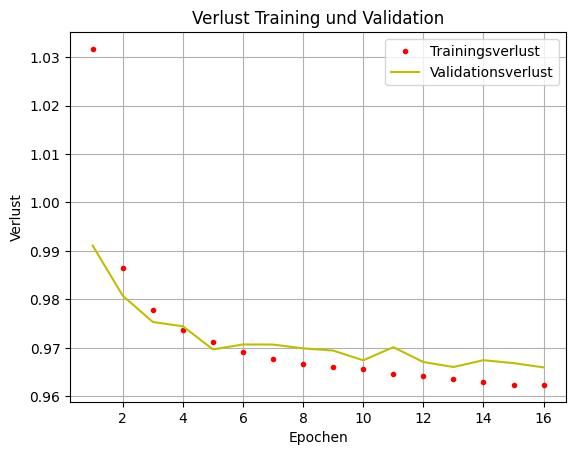

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r.', label='Trainingsverlust')
plt.plot(epochs, val_loss, 'y', label='Validationsverlust')
plt.title('Verlust Training und Validation')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.grid()
plt.legend()
plt.savefig('./Metriken/Verlust_FNN.png', dpi=300, bbox_inches='tight')
plt.show()

#### ▶️ Ausgabe der Genauigkeit für Training und Validation
***

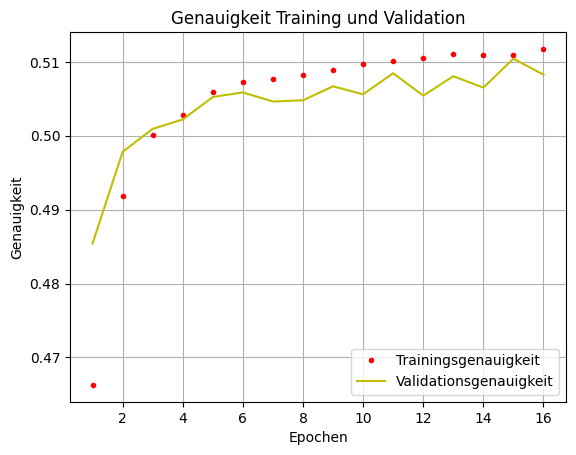

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'r.', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'y', label='Validationsgenauigkeit')
plt.title('Genauigkeit Training und Validation')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.grid()
plt.legend()
plt.savefig('./Metriken/Genauigkeit_FNN.png', dpi=300, bbox_inches='tight')
plt.show()

#### ▶️ Modell auf Testdaten anwenden und evaluieren
***

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9636515974998474
Test accuracy: 0.5112388134002686


#### ▶️ Metriken zur Beurteilung der Modellqualität 
***

2447/2447 [==============================] - 2s 962us/step


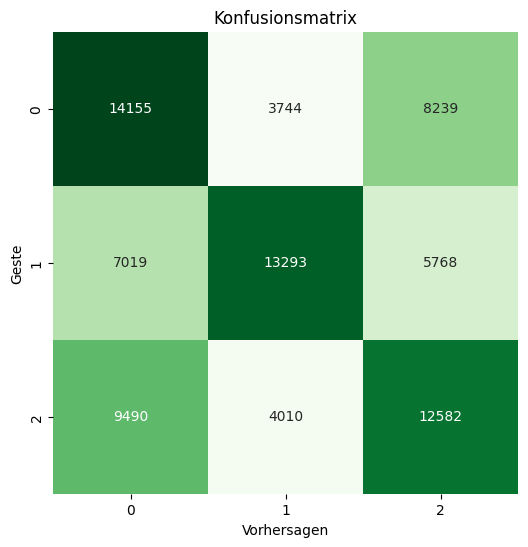

              precision    recall  f1-score   support

           0       0.46      0.54      0.50     26138
           1       0.63      0.51      0.56     26080
           2       0.47      0.48      0.48     26082

    accuracy                           0.51     78300
   macro avg       0.52      0.51      0.51     78300
weighted avg       0.52      0.51      0.51     78300



In [13]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)
 
cm = confusion_matrix(y_test_arg, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.xlabel("Vorhersagen")
plt.ylabel("Geste")
plt.title("Konfusionsmatrix")
plt.show()

print(classification_report(y_test_arg, y_pred))